In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image as img
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.utils import model_to_dot

import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [2]:
from google.colab import files

uploaded = files.upload()  # Opens a file upload dialog


Saving kaggle.json to kaggle.json


In [3]:
import os
import shutil

# Create .kaggle folder if not exists
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct directory
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set proper permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

In [4]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
seg_train = train_datagen.flow_from_directory('/content/seg_train/seg_train',
                                                 target_size = (256, 256),
                                              color_mode="rgb",
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
seg_test = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                            target_size = (256, 256),
                                            color_mode="rgb",
                                            batch_size = 32,
                                            class_mode = 'categorical')
IMAGE_SIZE = (256,256)

Found 3000 images belonging to 6 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,756,070 (60.10 MB)

 Trainable params: 15,756,070 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
trained= cnn.fit(x = seg_train, validation_data = seg_test, epochs = 25)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 211s 461ms/step - accuracy: 0.5581 - loss: 1.4950 - val_accuracy: 0.7043 - val_loss: 0.7891
Epoch 2/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 195s 443ms/step - accuracy: 0.7244 - loss: 0.7466 - val_accuracy: 0.7290 - val_loss: 0.7474
Epoch 3/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 198s 450ms/step - accuracy: 0.7704 - loss: 0.6303 - val_accuracy: 0.7743 - val_loss: 0.6129
Epoch 4/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 194s 441ms/step - accuracy: 0.7971 - loss: 0.5615 - val_accuracy: 0.8053 - val_loss: 0.5469
Epoch 5/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 194s 442ms/step - accuracy: 0.8186 - loss: 0.5021 - val_accuracy: 0.8180 - val_loss: 0.5338
Epoch 6/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 193s 440ms/step - accuracy: 0.8317 - loss: 0.4641 - val_accuracy: 0.7823 - val_loss: 0.5984
Epoch 7/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 194s 441ms/step - accuracy: 0.8373 - loss: 0.4459 - val_accuracy: 0.8223 - val_loss: 0.5238
Epoch 8/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 195s 443ms/step - accuracy: 0.8560 -

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step


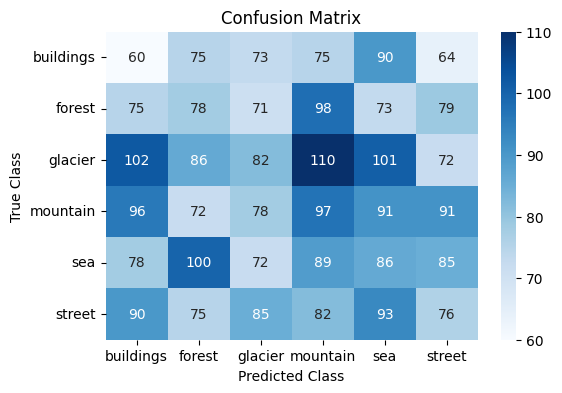

False Positive Rate (Type I Error): [0.88023952 0.83950617 0.82212581 0.82395644 0.83895131 0.8372591 ]
False Negative Rate (Type II Error): [0.86270023 0.83544304 0.8517179  0.8152381  0.83137255 0.84830339]
Z-Score: 1.1833052617201574, P-Value: 0.1183440941208525
T-Statistic: 1.2909345833647465, P-Value: 0.19677611564681374
F-Statistic: 1.6665120985270938, P-Value: 0.19677611564682185


In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn.predict(seg_test, steps=len(seg_test))
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the predicted classes

# Ground truth labels
y_true = seg_test.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=seg_test.class_indices.keys(), yticklabels=seg_test.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
# Type I Error (False Positive):
# (Predicted positive, but actual negative)

false_positive = cm.sum(axis=0) - np.diagonal(cm)
false_positive_rate = false_positive / cm.sum(axis=0)
print(f"False Positive Rate (Type I Error): {false_positive_rate}")
# Type II Error (False Negative):
# (Predicted negative, but actual positive)

false_negative = cm.sum(axis=1) - np.diagonal(cm)
false_negative_rate = false_negative / cm.sum(axis=1)
print(f"False Negative Rate (Type II Error): {false_negative_rate}")
from scipy.stats import norm

# Example data: Sample mean for the two datasets
mean1 = np.mean(y_true)  # True classes
mean2 = np.mean(y_pred_classes)  # Predicted classes
std1 = np.std(y_true)
std2 = np.std(y_pred_classes)

# Sample size
n1 = len(y_true)
n2 = len(y_pred_classes)

# Z-test formula
z_score = (mean1 - mean2) / np.sqrt((std1*2 / n1) + (std2*2 / n2))

# p-value from the Z-score
p_value = norm.sf(abs(z_score))  # One-tailed test

print(f"Z-Score: {z_score}, P-Value: {p_value}")
from scipy.stats import ttest_ind

# Example data: Two sample groups (true classes vs predicted classes)
t_stat, p_value = ttest_ind(y_true, y_pred_classes)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
from scipy.stats import f_oneway

# Assume you have multiple sets of predictions, here for demonstration we use two sets
group1 = y_true  # True labels
group2 = y_pred_classes  # Predicted labels

# One-way ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

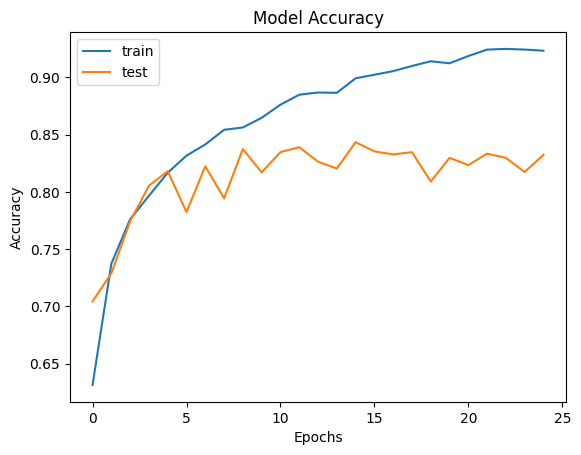

In [18]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [19]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('/content/seg_pred/seg_pred/5.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Building'
elif result[0][1] == 1:
  prediction = 'Forest'
elif result[0][2] == 1:
  prediction = 'Glacier'
elif result[0][3] == 1:
  prediction = 'Mountain'
elif result[0][4] == 1:
  prediction = 'Sea'
elif result[0][5] == 1:
  prediction = 'Street'
else:
    print("Error")
result
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
Building


Text(0.5, 1.0, 'Street Image')

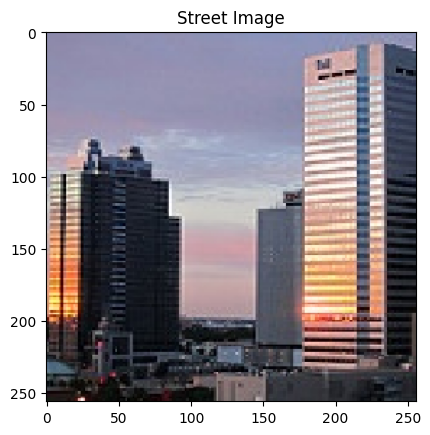

In [20]:
from IPython.display import display
from PIL import Image
display(plt.imshow(test_image1))
plt.title("Street Image")

In [48]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
seg_train = train_datagen.flow_from_directory('/content/seg_train/seg_train',
                                                 target_size = (200, 200),
                                              color_mode="grayscale",
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [49]:
test_datagen = ImageDataGenerator(rescale = 1./255)
seg_test = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                             color_mode="grayscale",
                                            class_mode = 'categorical')
IMAGE_SIZE = (200,200)


Found 3000 images belonging to 6 classes.


In [50]:
cnn = tf.keras.models.Sequential()

In [51]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[200,200, 1]))

In [52]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [53]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [54]:
cnn.add(tf.keras.layers.Flatten())

In [55]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [56]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [57]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 198, 198, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 97, 97, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       9,437,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,447,654 (36.04 MB)

 Trainable params: 9,447,654 (36.04 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [59]:
trained= cnn.fit(x = seg_train, validation_data = seg_test, epochs = 25)

Epoch 1/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 63s 134ms/step - accuracy: 0.4229 - loss: 1.5382 - val_accuracy: 0.6360 - val_loss: 0.9500
Epoch 2/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 74s 122ms/step - accuracy: 0.6564 - loss: 0.9030 - val_accuracy: 0.7050 - val_loss: 0.8190
Epoch 3/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 53s 121ms/step - accuracy: 0.7120 - loss: 0.7717 - val_accuracy: 0.6793 - val_loss: 0.9226
Epoch 4/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 54s 123ms/step - accuracy: 0.7425 - loss: 0.6906 - val_accuracy: 0.7423 - val_loss: 0.7219
Epoch 5/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 53s 121ms/step - accuracy: 0.7713 - loss: 0.6239 - val_accuracy: 0.7513 - val_loss: 0.6967
Epoch 6/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.7904 - loss: 0.5721 - val_accuracy: 0.7970 - val_loss: 0.5965
Epoch 7/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 53s 121ms/step - accuracy: 0.8040 - loss: 0.5332 - val_accuracy: 0.7417 - val_loss: 0.7878
Epoch 8/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.8173 - loss: 0

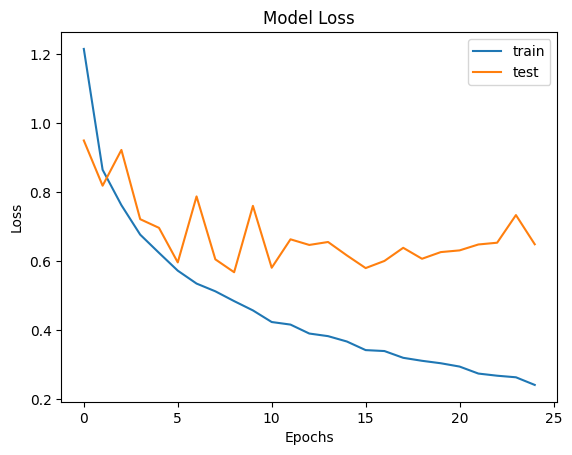

In [60]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

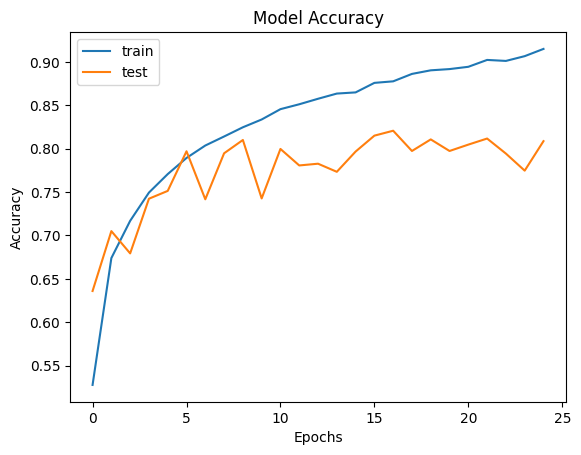

In [61]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [63]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('/content/seg_pred/seg_pred/5.jpg', target_size = (200, 200),color_mode="grayscale")
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Building'
elif result[0][1] == 1:
  prediction = 'Forest'
elif result[0][2] == 1:
  prediction = 'Glacier'
elif result[0][3] == 1:
  prediction = 'Mountain'
elif result[0][4] == 1:
  prediction = 'Sea'
elif result[0][5] == 1:
  prediction = 'Street'
else:
    print("Error")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


In [64]:
result

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [65]:
print(prediction)

Building


Text(0.5, 1.0, 'Street Image')

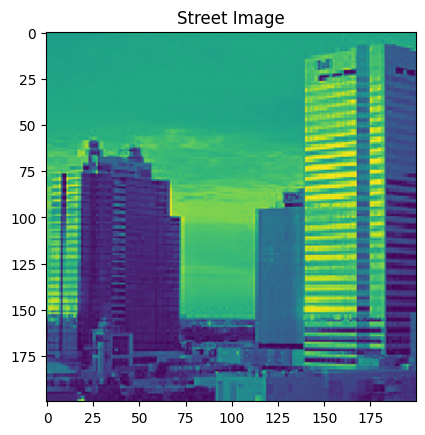

In [66]:
from IPython.display import display
from PIL import Image
display(plt.imshow(test_image1))
plt.title("Street Image")

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


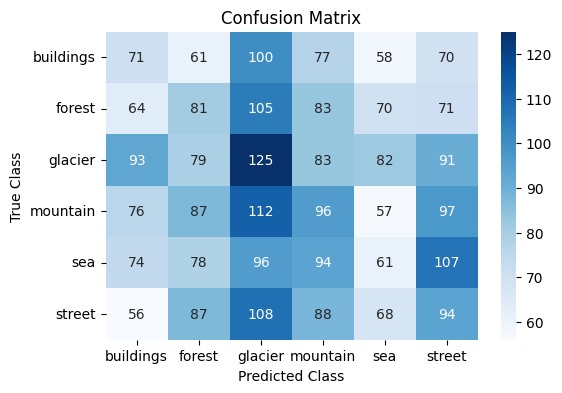

False Positive Rate (Type I Error): [0.83640553 0.82875264 0.80650155 0.81573896 0.8459596  0.82264151]
False Negative Rate (Type II Error): [0.8375286  0.82911392 0.77396022 0.81714286 0.88039216 0.81237525]
Z-Score: 0.9767366680360947, P-Value: 0.1643497684632778
T-Statistic: 1.0708000143431107, P-Value: 0.2843024461685436
F-Statistic: 1.1466126707171966, P-Value: 0.28430244616843536


In [68]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn.predict(seg_test, steps=len(seg_test))
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the predicted classes

# Ground truth labels
y_true = seg_test.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=seg_test.class_indices.keys(), yticklabels=seg_test.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
# Type I Error (False Positive):
# (Predicted positive, but actual negative)

false_positive = cm.sum(axis=0) - np.diagonal(cm)
false_positive_rate = false_positive / cm.sum(axis=0)
print(f"False Positive Rate (Type I Error): {false_positive_rate}")
# Type II Error (False Negative):
# (Predicted negative, but actual positive)

false_negative = cm.sum(axis=1) - np.diagonal(cm)
false_negative_rate = false_negative / cm.sum(axis=1)
print(f"False Negative Rate (Type II Error): {false_negative_rate}")
from scipy.stats import norm

# Example data: Sample mean for the two datasets
mean1 = np.mean(y_true)  # True classes
mean2 = np.mean(y_pred_classes)  # Predicted classes
std1 = np.std(y_true)
std2 = np.std(y_pred_classes)

# Sample size
n1 = len(y_true)
n2 = len(y_pred_classes)

# Z-test formula
z_score = (mean1 - mean2) / np.sqrt((std1*2 / n1) + (std2*2 / n2))

# p-value from the Z-score
p_value = norm.sf(abs(z_score))  # One-tailed test

print(f"Z-Score: {z_score}, P-Value: {p_value}")
from scipy.stats import ttest_ind

# Example data: Two sample groups (true classes vs predicted classes)
t_stat, p_value = ttest_ind(y_true, y_pred_classes)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
from scipy.stats import f_oneway

# Assume you have multiple sets of predictions, here for demonstration we use two sets
group1 = y_true  # True labels
group2 = y_pred_classes  # Predicted labels

# One-way ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


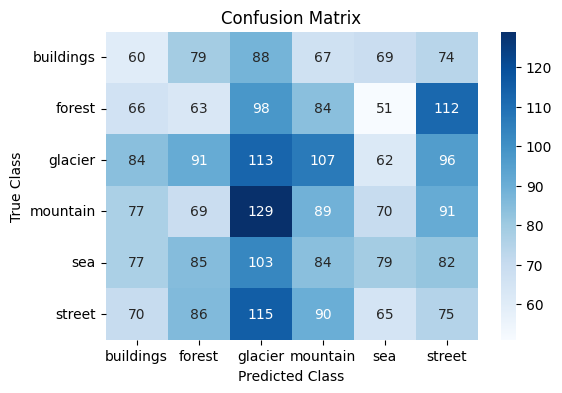

False Positive Rate (Type I Error): [0.86175115 0.86680761 0.8250774  0.82917466 0.80050505 0.85849057]
False Negative Rate (Type II Error): [0.86270023 0.86708861 0.79566004 0.83047619 0.84509804 0.8502994 ]
Z-Score: 0.9767366680360947, P-Value: 0.1643497684632778
T-Statistic: 1.0708000143431107, P-Value: 0.2843024461685436
F-Statistic: 1.1466126707171966, P-Value: 0.28430244616843536


In [67]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn.predict(seg_test, steps=len(seg_test))
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the predicted classes

# Ground truth labels
y_true = seg_test.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=seg_test.class_indices.keys(), yticklabels=seg_test.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
# Type I Error (False Positive):
# (Predicted positive, but actual negative)

false_positive = cm.sum(axis=0) - np.diagonal(cm)
false_positive_rate = false_positive / cm.sum(axis=0)
print(f"False Positive Rate (Type I Error): {false_positive_rate}")
# Type II Error (False Negative):
# (Predicted negative, but actual positive)

false_negative = cm.sum(axis=1) - np.diagonal(cm)
false_negative_rate = false_negative / cm.sum(axis=1)
print(f"False Negative Rate (Type II Error): {false_negative_rate}")
from scipy.stats import norm

# Example data: Sample mean for the two datasets
mean1 = np.mean(y_true)  # True classes
mean2 = np.mean(y_pred_classes)  # Predicted classes
std1 = np.std(y_true)
std2 = np.std(y_pred_classes)

# Sample size
n1 = len(y_true)
n2 = len(y_pred_classes)

# Z-test formula
z_score = (mean1 - mean2) / np.sqrt((std1*2 / n1) + (std2*2 / n2))

# p-value from the Z-score
p_value = norm.sf(abs(z_score))  # One-tailed test

print(f"Z-Score: {z_score}, P-Value: {p_value}")
from scipy.stats import ttest_ind

# Example data: Two sample groups (true classes vs predicted classes)
t_stat, p_value = ttest_ind(y_true, y_pred_classes)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
from scipy.stats import f_oneway

# Assume you have multiple sets of predictions, here for demonstration we use two sets
group1 = y_true  # True labels
group2 = y_pred_classes  # Predicted labels

# One-way ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")